# Get unique target fields given dithering

In [11]:
object_radec_df = df[['object', 'ra', 'dec']]

In [12]:
object_radec_groups = object_radec_df.groupby('object')

In [13]:
obj_name

NameError: name 'obj_name' is not defined

In [95]:
df.copy(deep=True)

,expnum,ra,dec,exptime,filter,propid,program,object,teff,fwhm,datetime,az,zd,ha,airmass,qc_fwhm,qc_cloud,qc_sky,qc_teff
0,229250,301.199042,-50.938332,90,g,2012B-0001,survey,DES survey hex -579-501 tiling 3,0.41,1.15,2013-08-31 23:55:07,139.5500,32.21,-33.208458,1.18,1.15,0.42,1.26,0.41
1,229251,300.851117,-52.967276,90,g,2012B-0001,survey,DES survey hex -582-521 tiling 3,0.60,1.18,2013-08-31 23:57:08,143.3200,32.76,-32.380917,1.19,1.18,0.15,1.23,0.60
2,229252,300.460079,-54.996221,90,g,2012B-0001,survey,DES survey hex -586-542 tiling 3,0.62,1.17,2013-08-31 23:59:08,146.9500,33.42,-31.494500,1.20,1.17,-0.07,1.22,0.62
3,229253,300.016742,-57.024887,90,g,2012B-0001,survey,DES survey hex -590-562 tiling 3,0.52,1.29,2013-09-01 00:01:11,150.4500,34.21,-30.536042,1.21,1.29,-0.21,1.20,0.52
4,229254,302.722079,-58.040193,90,g,2012B-0001,survey,DES survey hex -563-572 tiling 3,0.44,1.40,2013-09-01 00:03:13,150.5900,35.76,-32.738375,1.23,1.40,0.04,1.20,0.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88613,810366,58.930033,-42.303110,90,r,2012B-0001,des_celeb,NGC 1487,0.55,1.35,2019-01-10 04:27:33,238.7702,38.66,46.306458,1.28,1.35,0.09,-0.15,0.55
88614,810367,58.929917,-42.303138,90,i,2012B-0001,des_celeb,NGC 1487,0.51,1.16,2019-01-10 04:29:31,238.7969,39.02,46.803625,1.29,1.16,0.08,0.19,0.51
88615,810370,53.414579,-36.057110,45,i,2012B-0001,des_celeb,NGC 1365,0.30,1.41,2019-01-10 04:35:39,247.6877,44.83,53.840917,1.41,1.41,0.08,0.34,0.30
88616,810371,53.389708,-36.223610,45,g,2012B-0001,des_celeb,NGC 1365,0.46,1.59,2019-01-10 04:36:53,247.3923,45.09,54.204458,1.42,1.59,0.12,-0.18,0.46


In [21]:
df_filtered = df.copy(deep=True)
outlier_indices = []
for obj_name, g in object_radec_groups:
    # print(g.index)

    cutoff_deg = 3
    median_ra = g.ra.median()
    delta_ra = g.ra - median_ra
    delta_ra_shifted = np.remainder(delta_ra + 180, 360) - 180
    mask_outlier_ra = np.abs(delta_ra_shifted) > cutoff_deg

    median_dec = g.dec.median()
    delta_dec = g.dec - median_dec
    delta_dec_shifted = np.remainder(delta_dec + 180, 360) - 180
    mask_outlier_dec = np.abs(delta_dec_shifted) > cutoff_deg

    mask_outlier = mask_outlier_ra | mask_outlier_dec

    if np.count_nonzero(mask_outlier) > 0:
        indices = g.index[mask_outlier].values
        outlier_indices.extend(indices)
        

df_filtered.loc[outlier_indices, 'object'] = [f'{obj_name} (outlier)' for obj_name in df.loc[outlier_indices, 'object'].values]


In [15]:
df_filtered.loc[outlier_indices, 'object'].values

array(['DES survey hex -184-552 tiling 2 (outlier)',
       'DES survey hex -287-511 tiling 1 (outlier)',
       'DES survey hex -302-572 tiling 2 (outlier)',
       'DES survey hex 10-390 tiling 4 (outlier)',
       'DES survey hex 106-562 tiling 3 (outlier)',
       'DES survey hex 11-592 tiling 2 (outlier)',
       'DES survey hex 11-592 tiling 2 (outlier)',
       'DES survey hex 133-308 tiling 4 (outlier)',
       'DES survey hex 244-14 tiling 2 (outlier)',
       'DES survey hex 307+47 tiling 5 (outlier)',
       'DES survey hex 4+37 tiling 3 (outlier)',
       'DES survey hex 4-24 tiling 3 (outlier)',
       'DES survey hex 4-4 tiling 3 (outlier)',
       'DES survey hex 4-4 tiling 3 (outlier)',
       'DES survey hex 4-45 tiling 3 (outlier)',
       'DES survey hex 485-166 tiling 9 (outlier)',
       'DES survey hex 698-501 tiling 10 (outlier)',
       'DES survey hex 748-501 tiling 10 (outlier)',
       'DES survey hex 919-491 tiling 7 (outlier)',
       'DES survey hex 932-36

In [16]:
[f'{obj_name} (outlier)' for obj_name in df.loc[outlier_indices, 'object'].values]

['DES survey hex -184-552 tiling 2 (outlier)',
 'DES survey hex -287-511 tiling 1 (outlier)',
 'DES survey hex -302-572 tiling 2 (outlier)',
 'DES survey hex 10-390 tiling 4 (outlier)',
 'DES survey hex 106-562 tiling 3 (outlier)',
 'DES survey hex 11-592 tiling 2 (outlier)',
 'DES survey hex 11-592 tiling 2 (outlier)',
 'DES survey hex 133-308 tiling 4 (outlier)',
 'DES survey hex 244-14 tiling 2 (outlier)',
 'DES survey hex 307+47 tiling 5 (outlier)',
 'DES survey hex 4+37 tiling 3 (outlier)',
 'DES survey hex 4-24 tiling 3 (outlier)',
 'DES survey hex 4-4 tiling 3 (outlier)',
 'DES survey hex 4-4 tiling 3 (outlier)',
 'DES survey hex 4-45 tiling 3 (outlier)',
 'DES survey hex 485-166 tiling 9 (outlier)',
 'DES survey hex 698-501 tiling 10 (outlier)',
 'DES survey hex 748-501 tiling 10 (outlier)',
 'DES survey hex 919-491 tiling 7 (outlier)',
 'DES survey hex 932-369 tiling 3 (outlier)',
 'guided (outlier)']

In [17]:
np.count_nonzero(df_filtered.object.str.contains('outlier'))

np.int64(21)

In [ ]:
# df.loc[mask, 'base_object'] = df.loc[mask, 'object'].str.extract(pattern, expand=False)


In [18]:
df_filtered = df_filtered.drop(outlier_indices)

In [19]:
len(df_filtered)

88597

In [173]:
len(df) - len(df_filtered)

21

In [174]:
len(outlier_indices)

21

In [22]:
groups.get_group('DES survey hex 11-592 tiling 3')

NameError: name 'groups' is not defined

In [127]:
groups.object == 'DES survey hex 11-592 tiling 3'

False

In [23]:
df_dropped_outliers = df.drop('row2')

KeyError: "['row2'] not found in axis"

In [70]:
for g in object_radec_groups.groups:
    print(g.indices)
    break

AttributeError: 'str' object has no attribute 'indices'

In [51]:
groups = df.groupby('object')

In [63]:
groups.nth(1)

,expnum,ra,dec,exptime,filter,propid,program,object,teff,fwhm,datetime,az,zd,ha,airmass,qc_fwhm,qc_cloud,qc_sky,qc_teff
35,229286,301.198950,-50.937665,90,r,2012B-0001,survey,DES survey hex -579-501 tiling 3,0.51,1.11,2013-09-01 01:15:03,158.2900,22.94,-13.171250,1.09,1.11,0.15,3.69,0.51
42,229293,300.851371,-52.966582,90,r,2012B-0001,survey,DES survey hex -582-521 tiling 3,0.78,0.91,2013-09-01 01:31:05,166.6200,23.65,-8.818292,1.09,0.91,0.01,3.61,0.78
46,229297,306.056279,-52.966610,90,r,2012B-0001,survey,DES survey hex -530-521 tiling 3,0.82,0.90,2013-09-01 01:40:44,162.7900,24.28,-11.599083,1.10,0.90,-0.01,3.52,0.82
47,229298,303.324992,-53.981971,90,r,2012B-0001,survey,DES survey hex -558-532 tiling 3,0.71,0.97,2013-09-01 01:42:43,168.0200,24.53,-8.374167,1.10,0.97,0.00,3.50,0.71
50,229301,303.574200,-51.952471,90,r,2012B-0001,survey,DES survey hex -555-511 tiling 3,0.81,0.89,2013-09-01 01:48:45,168.3700,22.36,-7.101125,1.08,0.89,0.14,3.62,0.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88486,809774,43.826746,-66.882220,90,g,2012B-0001,survey,DES survey hex 458-674 tiling 2,0.64,1.39,2019-01-08 02:54:01,200.0261,42.48,36.086417,1.35,1.39,0.11,-0.24,0.64
88487,809775,63.086879,-66.932998,90,g,2012B-0001,survey,DES survey hex 611-674 tiling 9,0.88,1.20,2019-01-08 02:56:46,190.9898,38.20,17.590750,1.27,1.20,0.09,-0.28,0.88
88573,810322,41.159533,-66.476387,90,r,2012B-0001,survey,DES survey hex 418-663 tiling 8,0.85,1.03,2019-01-10 02:55:59,202.3400,43.85,41.238042,1.39,1.03,0.04,-0.03,0.85
88607,810357,58.954950,-42.284693,90,r,2012B-0001,des_celeb,NGC 1487,0.87,1.08,2019-01-10 04:14:01,238.5064,36.13,42.889208,1.24,1.08,0.09,-0.16,0.87


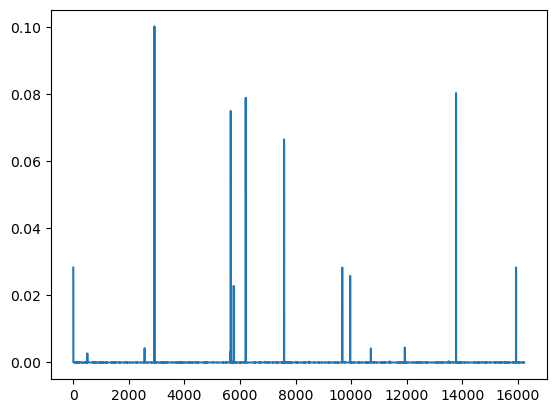

In [47]:
plt.plot(np.array(dith_areas)[np.array(dith_areas) < 1])

In [54]:
error_fields

['DES survey hex -302-572 tiling 2',
 'DES survey hex 106-562 tiling 3',
 'DES survey hex 4-24 tiling 3',
 'DES survey hex 748-501 tiling 10',
 'DES survey hex 10-390 tiling 4',
 'DES survey hex 485-166 tiling 9',
 'DES survey hex -184-552 tiling 2',
 'DES survey hex 4+37 tiling 3',
 'DES survey hex -287-511 tiling 1',
 'DES survey hex 11-592 tiling 2',
 'DES survey hex 698-501 tiling 10',
 'DES survey hex 133-308 tiling 4',
 'DES survey hex 4-45 tiling 3',
 'DES survey hex 919-491 tiling 7']

Check out fields which have very large dithering areas

In [55]:
mask = df['object'].isin(error_fields)

In [56]:
extracted_rows = df[mask]

In [57]:
one_tiling = extracted_rows[extracted_rows['object'].str.contains(error_fields[0])]

In [61]:
np.sort(one_tiling.ra)

array([328.396246, 328.396408, 328.396454, 328.396483, 328.396529,
       328.396529, 328.396575, 349.705033])

In [59]:
[(obj, ra, dec) for obj, ra, dec in zip(one_tiling.object, one_tiling.ra, one_tiling.dec)]

[('DES survey hex -302-572 tiling 2', 328.396408, -56.737859),
 ('DES survey hex -302-572 tiling 2', 328.396454, -56.737471),
 ('DES survey hex -302-572 tiling 2', 328.396483, -56.737471),
 ('DES survey hex -302-572 tiling 2', 328.396246, -56.737693),
 ('DES survey hex -302-572 tiling 2', 328.396575, -56.737582),
 ('DES survey hex -302-572 tiling 2', 349.705033, -46.592665),
 ('DES survey hex -302-572 tiling 2', 328.396529, -56.737526),
 ('DES survey hex -302-572 tiling 2', 328.396529, -56.737526)]

In [60]:
np.mean(one_tiling.ra)

np.float64(331.060032125)

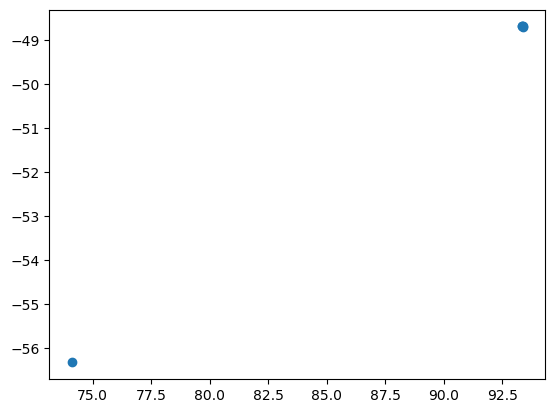

In [44]:
plt.scatter(one_tiling.ra, one_tiling.dec)